# AtliQ Hotels - Data Analytics Project
***

In [1]:
import pandas as pd

## Datasets

- dim_date.csv
- dim_hotels.csv
- dim_rooms.csv
- fact_bookings.csv
- fact_aggregated_bookings.csv


## 1. Loading Data and Initial Inspection 

In [2]:
# Read the data from csv and storing into dataframes

df_bookings = pd.read_csv("fact_bookings.csv")

df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")

df_hotels = pd.read_csv("dim_hotels.csv")

df_rooms = pd.read_csv("dim_rooms.csv")

df_date = pd.read_csv("dim_date.csv")


In [3]:
# Inspect bookings data

df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
# Inspect aggregated bookings data

df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [5]:
# Inspect hotels data

df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [6]:
# Inspect rooms data

df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [7]:
# Inspect date data

df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


## 2. EDA and Cleaning -  *fact_bookings*

In [8]:
# Check the number of rows and columns of the bookings data

df_bookings.shape

(134590, 12)

In [9]:
# Check the datatypes of the columns

df_bookings.dtypes

booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests            float64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
dtype: object

In [10]:
# Explicitly convert date column to datetime64 datatype

date_cols = ["booking_date", "check_in_date", "checkout_date"]

def parse_two_formats(s):
    return (
        pd.to_datetime(s, format="%d-%m-%y", errors="coerce")
        .fillna(pd.to_datetime(s, format="%d/%m/%Y", errors="coerce"))
    )

for col in date_cols:
    df_bookings[col] = parse_two_formats(df_bookings[col])
    

In [11]:
# Check for null values across the columns

df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

#### The ratings_given column contains many null values, which is expected since not all customers submit ratings. No cleaning or transformation is required here.

In [12]:
# Identify the various categories of booking platforms

df_bookings["booking_platform"].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [13]:
# Understand which are the top performing booking platforms basis the number of bookings recorded

df_bookings["booking_platform"].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

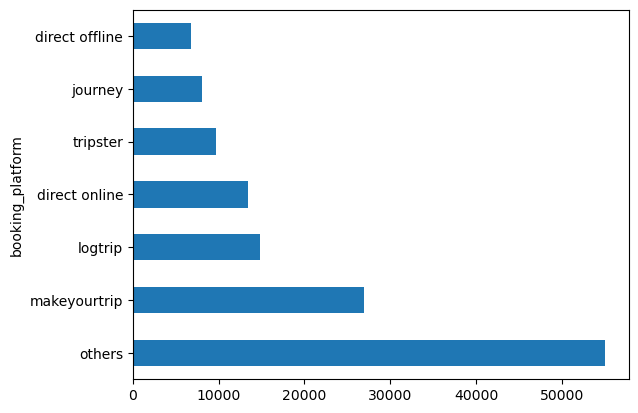

In [14]:
# Visualize the distribution of bookings recorded across various platforms 

df_bookings["booking_platform"].value_counts().plot(kind = "barh")

In [15]:
# Understand the basic statistics of bookings data 

df_bookings.describe().round(2)

,property_id,booking_date,check_in_date,checkout_date,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.00,134590,134590,134590,134587.00,56683.00,134590.00,134590.00
mean,18061.11,2022-06-11 05:51:49.871461120,2022-06-14 22:52:29.939816960,2022-06-17 07:51:51.262352640,2.04,3.62,15378.05,12696.12
min,16558.00,2022-04-07 00:00:00,2022-05-01 00:00:00,2022-05-02 00:00:00,-17.00,1.00,6500.00,2600.00
25%,17558.00,2022-05-19 00:00:00,2022-05-23 00:00:00,2022-05-25 00:00:00,1.00,3.00,9900.00,7600.00
50%,17564.00,2022-06-11 00:00:00,2022-06-15 00:00:00,2022-06-17 00:00:00,2.00,4.00,13500.00,11700.00
75%,18563.00,2022-07-04 00:00:00,2022-07-08 00:00:00,2022-07-10 00:00:00,2.00,5.00,18000.00,15300.00
max,19563.00,2022-07-31 00:00:00,2022-07-31 00:00:00,2022-08-06 00:00:00,6.00,5.00,28560000.00,45220.00
std,1093.06,NaN,NaN,NaN,1.03,1.24,93036.04,6928.11


### Points to note:

- Negative guest counts indicate data quality issues that require cleaning.

- The maximum revenue generated per booking appears unrealistically high, suggesting a potential data error.

In [16]:
# Identify the number of records where number of guests is negative

df_bookings[df_bookings["no_guests"] < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,2022-05-12,2022-05-12,2022-05-14,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,2022-05-08,2022-05-12,2022-05-14,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,2022-05-05,2022-05-12,2022-05-17,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,2022-05-10,2022-05-12,2022-05-17,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,2022-06-05,2022-06-08,2022-06-13,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,2022-07-19,2022-07-20,2022-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [17]:
# Remove these faulty records from the dataset

df_bookings = df_bookings[df_bookings["no_guests"] > 0]

In [18]:
# Check the revised shape of the cleaned dataset

df_bookings.shape

(134578, 12)

#### We have dropped 12 records that had number of guests as less than 0.

In [19]:
# Identify the minimum and maximum revenue generated

df_bookings["revenue_generated"].min(), df_bookings["revenue_generated"].max()


(6500, 28560000)

#### Revenue of 28560000 for a single booking appears unrealistic. We now will check how many records have outlier values. 

In [20]:
avg = df_bookings["revenue_generated"].mean()
std = df_bookings["revenue_generated"].std()

rev_gen_lower_limit = avg - 3*std
rev_gen_higher_limit = avg + 3*std

In [21]:
# Check for the number of outlier records

df_bookings[df_bookings["revenue_generated"] > rev_gen_higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,2022-04-29,2022-05-01,2022-05-02,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,2022-04-28,2022-05-01,2022-05-04,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,2022-04-26,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,2022-07-21,2022-07-28,2022-07-29,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


- The outlier records show three extra zeros in the revenue_generated column when referenced with revenue_realized and could be corrected.

- For this project, these records will be excluded from the analysis.

In [22]:
# Remove these outlier records from the dataset

df_bookings = df_bookings[df_bookings["revenue_generated"] < rev_gen_higher_limit]

In [23]:
# Check the revised shape of the cleaned dataset

df_bookings.shape

(134573, 12)

#### We have dropped 5 records where revenue generated is beyond 3 standard deviations from the mean value.

In [24]:
# Perform a sanity check on whether values in revenue_realized column are within limits

df_bookings["revenue_realized"].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [25]:
rev_realized_lower_limit = 12695.983585 - 3*6927.791692
rev_realized_higher_limit = 12695.983585 + 3*6927.791692

In [26]:
# Check for outliers in revenue_realized

df_bookings[df_bookings["revenue_realized"] > rev_realized_higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,2022-04-28,2022-05-01,2022-05-03,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,2022-04-24,2022-05-01,2022-05-07,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,2022-04-30,2022-05-01,2022-05-03,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,2022-07-31,2022-07-31,2022-08-02,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,2022-07-31,2022-07-31,2022-08-01,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,2022-07-28,2022-07-31,2022-08-01,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,2022-07-25,2022-07-31,2022-08-06,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


#### These are too many records where revenue realized exceeds 3 standard deviations from the mean of the revenue_realized column. We cannot drop this many records from analysis. However, a specific pattern emerges - these records seem to belong to room_category RT4 a.k.a the Presidential class of rooms.

In [27]:
# Perform a sanity check on whether values in RT4 records for revenue_realized column are within limits

df_bookings[df_bookings["room_category"] == "RT4"]["revenue_realized"].describe()


count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [28]:
rev_realized_higher_limit_RT4 = 23439.308444 + 3*9048.599076
rev_realized_higher_limit_RT4

50585.105672000005

#### Since the maximum revenue realized is less than the outlier limit calculated in the above cell, there are no outliers, and we can proceed with analysis.

## 3. EDA and Cleaning -  *dim_hotels*

In [29]:
# Check the spread of hotels in each category

df_hotels["category"].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [30]:
# Check the number of hotels in each city

df_hotels["city"].value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [31]:
# Check for null values across the columns

df_hotels.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

## 4. EDA and Cleaning -  *dim_date*

In [32]:
# Clean spelling error in day_type column

df_date["day_type"] = df_date["day_type"].replace("weekeday","weekday")
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekday
2,03-May-22,May 22,W 19,weekday
3,04-May-22,May 22,W 19,weekday
4,05-May-22,May 22,W 19,weekday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekday
88,28-Jul-22,Jul 22,W 31,weekday
89,29-Jul-22,Jul 22,W 31,weekday
90,30-Jul-22,Jul 22,W 31,weekend


In [33]:
# Explicitly convert date column to datetime64 datatype

df_date["date"] = pd.to_datetime(
    df_date["date"],
    format="%d-%b-%y",
    errors="coerce"
)

In [34]:
# Check for null values across the columns

df_date.isnull().sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

## 5. EDA and Cleaning - *fact_aggregated_bookings*

In [35]:
# Check the datatypes of the columns

df_agg_bookings.dtypes

property_id              int64
check_in_date           object
room_category           object
successful_bookings      int64
capacity               float64
dtype: object

In [36]:
# Explicitly convert check_in_date column to datetime64 datatype

df_agg_bookings["check_in_date"] = pd.to_datetime(
    df_agg_bookings["check_in_date"],
    format="%d-%b-%y",
    errors="coerce"
)

In [37]:
# Re-Check the datatypes of the columns after type conversion

df_agg_bookings.dtypes

property_id                     int64
check_in_date          datetime64[ns]
room_category                  object
successful_bookings             int64
capacity                      float64
dtype: object

In [38]:
# Check for any errors/ null values across the columns

df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [39]:
# Check the number of rows and columns of the aggregated bookings dataframe

df_agg_bookings.shape

(9200, 5)

In [40]:
# Identify the records with null values to understand what is the best substitute 

df_agg_bookings[df_agg_bookings["capacity"].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,2022-05-01,RT1,22,NaN
14,17562,2022-05-01,RT1,12,NaN


#### Since both records are of room category RT1, we can substitute it with the median capacity for RT1.

In [41]:
df_agg_bookings["capacity"] = df_agg_bookings["capacity"].fillna(    
    df_agg_bookings[df_agg_bookings["room_category"] == "RT1"]["capacity"].median()
)

df_agg_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0
5,17560,2022-05-01,RT1,28,40.0
6,19558,2022-05-01,RT1,25,40.0
7,19560,2022-05-01,RT1,23,26.0
8,17561,2022-05-01,RT1,22,30.0
9,16560,2022-05-01,RT1,24,34.0


In [42]:
# Find out the number of unique property ids in aggregate bookings dataset

df_agg_bookings["property_id"].nunique()

25

In [43]:
# Find out total bookings per property_id

df_agg_bookings.groupby("property_id")["successful_bookings"].sum().sort_values(ascending = False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

In [44]:
# Find out days on which bookings are greater than capacity

df_agg_bookings[df_agg_bookings["successful_bookings"] > df_agg_bookings["capacity"]]


,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,2022-05-01,RT1,30,19.0
12,16563,2022-05-01,RT1,100,41.0
4136,19558,2022-06-11,RT2,50,39.0
6209,19560,2022-07-02,RT1,123,26.0
8522,19559,2022-07-25,RT1,35,24.0
9194,18563,2022-07-31,RT4,20,18.0


In [45]:
# Find out properties that have highest capacity

df_agg_bookings[ df_agg_bookings["capacity"] == df_agg_bookings["capacity"].max()]


,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,2022-05-01,RT2,38,50.0
128,17558,2022-05-02,RT2,27,50.0
229,17558,2022-05-03,RT2,26,50.0
328,17558,2022-05-04,RT2,27,50.0
428,17558,2022-05-05,RT2,29,50.0
...,...,...,...,...,...
8728,17558,2022-07-27,RT2,22,50.0
8828,17558,2022-07-28,RT2,21,50.0
8928,17558,2022-07-29,RT2,23,50.0
9028,17558,2022-07-30,RT2,32,50.0


## 6. Data Transformation

In [46]:
# Create a new column to track Occupany % in the fact_aggregated_bookings data

df_agg_bookings["occ_pct"] = (
    df_agg_bookings["successful_bookings"] / df_agg_bookings["capacity"] * 100
).round(2)

## 7. Insights 

In [47]:
# Merge fact_aggregate_bookings and dim_rooms for accessing room_class

df_merged = pd.merge(df_agg_bookings, df_rooms, left_on = "room_category", right_on = "room_id", how = "left")

df_merged.drop("room_id", axis = 1, inplace = True)

df_merged

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard
3,17558,2022-05-01,RT1,30,19.0,157.89,Standard
4,16558,2022-05-01,RT1,18,19.0,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18.0,72.22,Presidential
9196,16559,2022-07-31,RT4,13,18.0,72.22,Presidential
9197,17558,2022-07-31,RT4,3,6.0,50.00,Presidential
9198,19563,2022-07-31,RT4,3,6.0,50.00,Presidential


In [48]:
# Find the average occupancy rate for each room category

df_merged.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [49]:
# Merge df_merged with dim_hotels for accessing city

df_merged = pd.merge(df_merged, df_hotels, on = "property_id", how = "left")

df_merged

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,2022-05-01,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,2022-05-01,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi
9196,16559,2022-07-31,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai
9197,17558,2022-07-31,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai
9198,19563,2022-07-31,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore


In [50]:
# Find the average occupancy rate for each city

df_merged.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Bangalore    56.59
Name: occ_pct, dtype: float64

In [51]:
# Merge df_merged with dim_date for accessing day_type

df_merged = pd.merge(df_merged, df_date, left_on = "check_in_date", right_on ="date", how = "left")

df_merged.drop("date", axis = 1, inplace = True)

df_merged

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,May 22,W 19,weekend
3,17558,2022-05-01,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 19,weekend
4,16558,2022-05-01,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
9196,16559,2022-07-31,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,Jul 22,W 32,weekend
9197,17558,2022-07-31,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
9198,19563,2022-07-31,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend


In [52]:
# Find out whether occupancy was better on weedays or weekends

df_merged.groupby("day_type")["occ_pct"].mean().round(2).sort_values(ascending = False)

day_type
weekend    74.23
weekday    51.82
Name: occ_pct, dtype: float64

In [53]:
# Find out average occupancy rate across different cities in the month of June

df_june = df_merged[df_merged["mmm yy"] == "Jun 22"]

df_june.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.95
Name: occ_pct, dtype: float64

## Access updated data for August

In [54]:
# Read the data from csv and store into dataframe

df_august = pd.read_csv("new_data_august.csv")

df_august = df_august.rename(columns = {"occ%" : "occ_pct"}) # Renamed column to allow for better concatenation

df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [55]:
# Explicitly convert check_in_date column to datetime64 datatype

df_august["check_in_date"] = pd.to_datetime(
    df_august["check_in_date"],
    format="%d-%b-%y",
    errors="coerce"
)

In [56]:
# Clean spelling error in day_type column of df_august

df_august["day_type"] = df_august["day_type"].replace("weekeday","weekday")
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,2022-08-01,Aug-22,W 32,weekday,10,16,62.50


In [57]:
# Concatenate df_merged with df_august

df_updated = pd.concat([df_merged,df_august], ignore_index = True)

df_updated.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
9202,19563,2022-08-01,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekday
9203,19558,2022-08-01,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekday
9204,19560,2022-08-01,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekday
9205,17561,2022-08-01,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekday
9206,17564,2022-08-01,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekday


In [58]:
# Merge df_hotels with df_bookings to access revenue_realized

df_hotel_bookings = pd.merge(df_bookings, df_hotels, on = "property_id", how = "left")

df_hotel_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,2022-04-26,2022-05-01,2022-05-03,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [59]:
# Find out revenue realized per city

df_hotel_bookings.groupby("city")["revenue_realized"].sum().sort_values(ascending = False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

In [60]:
# Merge df_date with df_bookings to access revenue_realized by month

df_date_bookings = pd.merge(df_bookings, df_date, left_on = "check_in_date", right_on = "date", how = "left")

df_date_bookings.drop("date", axis = 1, inplace = True)

df_date_bookings


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend
1,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,10920,10920,May 22,W 19,weekend
2,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2.0,RT1,others,4.0,Checked Out,9100,9100,May 22,W 19,weekend
3,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekend
4,May012216558RT18,16558,2022-04-26,2022-05-01,2022-05-03,2.0,RT1,logtrip,NaN,No Show,9100,9100,May 22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134568,Jul312217564RT45,17564,2022-07-30,2022-07-31,2022-08-01,2.0,RT4,others,2.0,Checked Out,32300,32300,Jul 22,W 32,weekend
134569,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Jul 22,W 32,weekend
134570,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Jul 22,W 32,weekend
134571,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Jul 22,W 32,weekend


In [61]:
# Find out revenue realized per month

df_date_bookings.groupby("mmm yy")["revenue_realized"].sum().sort_values(ascending = False)

mmm yy
May 22    581767396
Jul 22    572843348
Jun 22    553925855
Name: revenue_realized, dtype: int64

In [62]:
# Find out revenue realized per hotel type

df_hotel_bookings.groupby("category")["revenue_realized"].sum().sort_values(ascending = False)

category
Luxury      1052569562
Business     655967037
Name: revenue_realized, dtype: int64

In [63]:
# Find out average ratings per city

df_hotel_bookings.groupby("city")["ratings_given"].mean().round(2).sort_values(ascending = False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

<Axes: ylabel='booking_platform'>

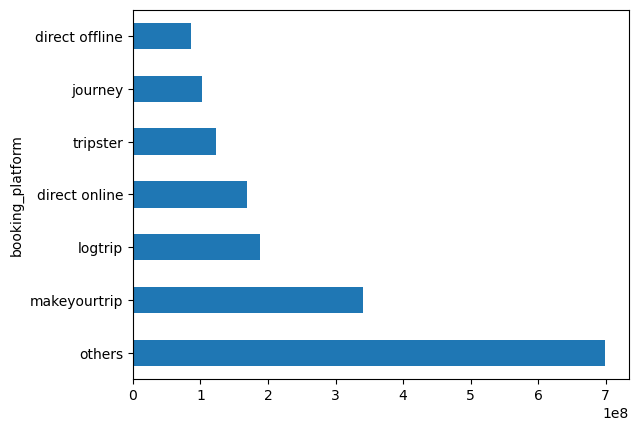

In [64]:
# Check revenue realized per booking platform

df_date_bookings.groupby("booking_platform")["revenue_realized"].sum().sort_values(ascending = False).plot(kind="barh")